In [1]:
!pip install deap


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')

# Select the first 50 rows of the dataset
df = df.head(50)

# Check for missing values before preprocessing
print("Missing values before preprocessing:", df.isnull().sum())

# Preprocessing: handle categorical columns
categorical_cols = ['sex', 'anatom_site_general']  # Adjust based on your data
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Ensure all columns are numeric (if any other columns need to be numeric)
df = df.apply(pd.to_numeric, errors='coerce')

# Check for missing values after preprocessing
print("Missing values after preprocessing:", df.isnull().sum())

# Remove columns with no non-missing values (if any)
df = df.dropna(axis=1, how='all')

# Check again for missing values after dropping columns
print("Missing values after dropping columns with no data:", df.isnull().sum())

# Use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check again for missing values after imputation
print("Missing values after imputation:", df_imputed.isnull().sum())

# Make sure 'target' column exists
if 'target' not in df_imputed.columns:
    print("'target' column is missing from the dataset. Please check the column name.")
else:
    # Split the data into features (X) and target (y)
    X = df_imputed.drop(columns=['target'])  # Replace 'target' with your actual target column
    y = df_imputed['target']  # Replace 'target' with your actual target column

    # Check if there's enough data after imputation
    print(f"Shape of the data after imputation: {df_imputed.shape}")

    # Train-Test Split
    if X.shape[0] > 1:  # Ensure there are enough samples for splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Firefly Algorithm for hyperparameter tuning

        # Define the fitness function
        def fitness_function(params):
            # Extract parameters
            n_estimators = int(params[0])
            max_depth = int(params[1])

            # Create the model with the given parameters
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

            # Train and predict
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Return accuracy as the fitness value (higher is better)
            return accuracy_score(y_test, y_pred)

        # Firefly Algorithm
        def firefly_algorithm(n=20, max_iter=10, alpha=0.5, beta_min=0.2, gamma=1.0):
            # Initialize population of fireflies (random parameter sets)
            fireflies = np.random.rand(n, 2)  # 2 params: n_estimators and max_depth
            fireflies[:, 0] = fireflies[:, 0] * 100 + 50  # n_estimators between 50 and 150
            fireflies[:, 1] = fireflies[:, 1] * 20 + 1  # max_depth between 1 and 20

            # Initialize the best solution
            best_fitness = -1
            best_params = None

            # Loop through generations (iterations)
            for iteration in range(max_iter):
                for i in range(n):
                    # Compute fitness of firefly i
                    fitness_i = fitness_function(fireflies[i])

                    # Update best solution if needed
                    if fitness_i > best_fitness:
                        best_fitness = fitness_i
                        best_params = fireflies[i]

                    # Move other fireflies towards the brighter one
                    for j in range(n):
                        if fitness_i < fitness_function(fireflies[j]):
                            # Update position of firefly i
                            r = np.linalg.norm(fireflies[i] - fireflies[j])
                            fireflies[i] = fireflies[i] + alpha * (fireflies[j] - fireflies[i]) * np.exp(-gamma * r**2) + beta_min * np.random.rand(2)

                print(f"Iteration {iteration + 1}: Best Fitness = {best_fitness}")

            return best_params, best_fitness

        # Run the Firefly Algorithm to optimize hyperparameters
        best_params, best_fitness = firefly_algorithm()

        print("Best Parameters found:", best_params)
        print("Best Fitness (Accuracy) found:", best_fitness)
    else:
        print("Not enough samples after preprocessing for train-test split.")


C:\Users\USER\AppData\Local\Temp\ipykernel_13800\4055519119.py:10: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


Missing values before preprocessing: isic_id                          0
target                           0
patient_id                       0
age_approx                       0
sex                              0
anatom_site_general              0
clin_size_long_diam_mm           0
image_type                       0
tbp_tile_type                    0
tbp_lv_A                         0
tbp_lv_Aext                      0
tbp_lv_B                         0
tbp_lv_Bext                      0
tbp_lv_C                         0
tbp_lv_Cext                      0
tbp_lv_H                         0
tbp_lv_Hext                      0
tbp_lv_L                         0
tbp_lv_Lext                      0
tbp_lv_areaMM2                   0
tbp_lv_area_perim_ratio          0
tbp_lv_color_std_mean            0
tbp_lv_deltaA                    0
tbp_lv_deltaB                    0
tbp_lv_deltaL                    0
tbp_lv_deltaLB                   0
tbp_lv_deltaLBnorm               0
tbp_lv_eccentricit

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Read the data
df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')

# Use only the first 50 rows for testing
df = df.head(50)

# Check for missing values and drop columns with all NaN values
df = df.dropna(axis=1, how='all')

# Handle categorical columns using label encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Check if the 'target' column exists. If not, replace it with your actual target column.
print("Columns in data:", df.columns)

# Make sure the target column is correctly identified
target_column = 'target'  # Change this if your target column has a different name
if target_column not in df.columns:
    print(f"Error: '{target_column}' column not found in data")
else:
    # Separate features and target
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    # Impute missing values with the mean
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the RandomForest model
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")


C:\Users\USER\AppData\Local\Temp\ipykernel_13800\668896596.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


Columns in data: Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'tbp_lv_dnn_lesion_confidence'],
      dtype='object

In [4]:
print(df['target'].value_counts())


target
0    50
Name: count, dtype: int64


In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load and prepare data
df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')
df = df.head(50)  # Only using 50 rows for testing

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Specify your target column
target_column = 'target'  # Replace if it's named differently

if target_column not in df.columns:
    print(f"'{target_column}' column not found!")
else:
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Initialize RandomForest
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

    # Set up Stratified 5-Fold CV
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Get cross-validated accuracy scores
    cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

    print("Cross-Validation Accuracy Scores:", cv_scores)
    print(f"Average Accuracy: {cv_scores.mean() * 100:.2f}%")


C:\Users\USER\AppData\Local\Temp\ipykernel_13800\44582283.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 100.00%


In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')
df = df.head(500)  # Use 500 rows

# Drop fully empty columns
df = df.dropna(axis=1, how='all')

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Set your target column
target_column = 'target'  # Change if needed
if target_column not in df.columns:
    print(f"'{target_column}' column not found!")
else:
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define fitness function
    def fitness_function(params):
        n_estimators = int(params[0])
        max_depth = int(params[1])
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Firefly Algorithm
    def firefly_algorithm(n=20, max_iter=10, alpha=0.5, beta_min=0.2, gamma=1.0):
        fireflies = np.random.rand(n, 2)
        fireflies[:, 0] = fireflies[:, 0] * 100 + 50   # n_estimators: 50 to 150
        fireflies[:, 1] = fireflies[:, 1] * 20 + 1     # max_depth: 1 to 20

        best_fitness = -1
        best_params = None

        for iteration in range(max_iter):
            for i in range(n):
                fitness_i = fitness_function(fireflies[i])
                if fitness_i > best_fitness:
                    best_fitness = fitness_i
                    best_params = fireflies[i]
                for j in range(n):
                    fitness_j = fitness_function(fireflies[j])
                    if fitness_i < fitness_j:
                        r = np.linalg.norm(fireflies[i] - fireflies[j])
                        fireflies[i] += alpha * (fireflies[j] - fireflies[i]) * np.exp(-gamma * r**2) + beta_min * np.random.rand(2)
            print(f"Iteration {iteration+1}: Best Fitness = {best_fitness:.4f}")

        return best_params, best_fitness

    # Run Firefly Algorithm
    best_params, best_fitness = firefly_algorithm()
    print("🔥 Best Parameters found:", [int(best_params[0]), int(best_params[1])])
    print(f"🔥 Best Fitness (Accuracy): {best_fitness * 100:.2f}%")



C:\Users\USER\AppData\Local\Temp\ipykernel_13800\3849940797.py:10: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


Iteration 1: Best Fitness = 1.0000
Iteration 2: Best Fitness = 1.0000
Iteration 3: Best Fitness = 1.0000
Iteration 4: Best Fitness = 1.0000
Iteration 5: Best Fitness = 1.0000
Iteration 6: Best Fitness = 1.0000
Iteration 7: Best Fitness = 1.0000
Iteration 8: Best Fitness = 1.0000
Iteration 9: Best Fitness = 1.0000
Iteration 10: Best Fitness = 1.0000
🔥 Best Parameters found: [93, 12]
🔥 Best Fitness (Accuracy): 100.00%


In [10]:
df = pd.read_csv(
    'C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv',
    dtype={51: str, 52: str}
)


C:\Users\USER\AppData\Local\Temp\ipykernel_13800\1480330629.py:11: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


Iteration 1: Best Fitness = 1.0000
Iteration 2: Best Fitness = 1.0000
Iteration 3: Best Fitness = 1.0000
Iteration 4: Best Fitness = 1.0000
Iteration 5: Best Fitness = 1.0000
Iteration 6: Best Fitness = 1.0000
Iteration 7: Best Fitness = 1.0000
Iteration 8: Best Fitness = 1.0000
Iteration 9: Best Fitness = 1.0000
Iteration 10: Best Fitness = 1.0000
Iteration 11: Best Fitness = 1.0000
Iteration 12: Best Fitness = 1.0000
Iteration 13: Best Fitness = 1.0000
Iteration 14: Best Fitness = 1.0000
Iteration 15: Best Fitness = 1.0000
Iteration 16: Best Fitness = 1.0000
Iteration 17: Best Fitness = 1.0000
Iteration 18: Best Fitness = 1.0000
Iteration 19: Best Fitness = 1.0000
Iteration 20: Best Fitness = 1.0000
Iteration 21: Best Fitness = 1.0000
Iteration 22: Best Fitness = 1.0000
Iteration 23: Best Fitness = 1.0000
Iteration 24: Best Fitness = 1.0000
Iteration 25: Best Fitness = 1.0000
Iteration 26: Best Fitness = 1.0000
Iteration 27: Best Fitness = 1.0000
Iteration 28: Best Fitness = 1.0000
I

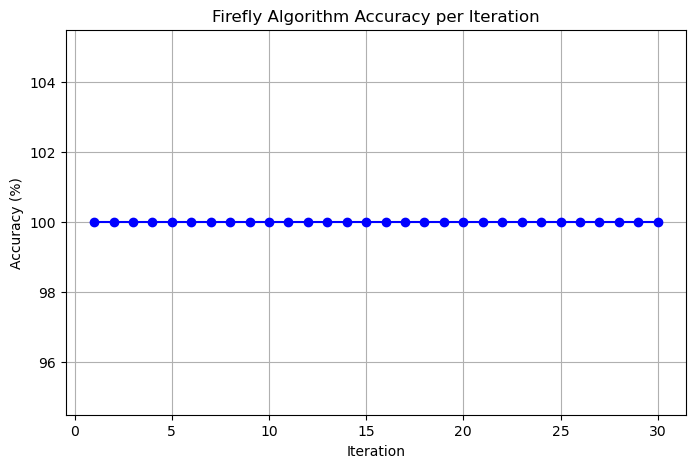

Best Parameters found: [56, 11]
Best Fitness (Accuracy): 100.00%


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')
df = df.head(500)  # Use 500 rows

# Drop fully empty columns
df = df.dropna(axis=1, how='all')

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Set your target column
target_column = 'target'  # Change if needed
if target_column in df.columns:
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define fitness function
    def fitness_function(params):
        n_estimators = int(params[0])
        max_depth = int(params[1])
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Firefly Algorithm with fitness tracking
    def firefly_algorithm(n=20, max_iter=10, alpha=0.5, beta_min=0.2, gamma=1.0):
        fireflies = np.random.rand(n, 2)
        fireflies[:, 0] = fireflies[:, 0] * 100 + 50   # n_estimators: 50 to 150
        fireflies[:, 1] = fireflies[:, 1] * 20 + 1     # max_depth: 1 to 20

        best_fitness = -1
        best_params = None
        fitness_history = []  # Accuracy per iteration

        # Loop over the iterations
        for iteration in range(max_iter):
            for i in range(n):
                fitness_i = fitness_function(fireflies[i])
                if fitness_i > best_fitness:
                    best_fitness = fitness_i
                    best_params = fireflies[i]
                for j in range(n):
                    fitness_j = fitness_function(fireflies[j])
                    if fitness_i < fitness_j:
                        r = np.linalg.norm(fireflies[i] - fireflies[j])
                        fireflies[i] += alpha * (fireflies[j] - fireflies[i]) * np.exp(-gamma * r**2) + beta_min * np.random.rand(2)

            # Store the best fitness of this iteration
            fitness_history.append(best_fitness)
            print(f"Iteration {iteration+1}: Best Fitness = {best_fitness:.4f}")

        # Plot accuracy over iterations
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_iter + 1), [f * 100 for f in fitness_history], marker='o', color='blue')
        plt.title("Firefly Algorithm Accuracy per Iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy (%)")
        plt.grid(True)
        plt.show()

        return best_params, best_fitness

    # Run Firefly Algorithm
    best_params, best_fitness = firefly_algorithm(max_iter=30)  # Example with 30 iterations
    print("Best Parameters found:", [int(best_params[0]), int(best_params[1])])
    print(f"Best Fitness (Accuracy): {best_fitness * 100:.2f}%")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')
df = df.head(500)  # Use 500 rows

# Drop fully empty columns
df = df.dropna(axis=1, how='all')

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Set your target column
target_column = 'target'  # Change if needed
if target_column in df.columns:
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define fitness function for SVM
    def fitness_function(params):
        C = float(params[0])
        gamma = float(params[1])
        model = SVC(C=C, gamma=gamma, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Firefly Algorithm for SVM hyperparameter optimization
    def firefly_algorithm(n=20, max_iter=5, alpha=0.5, beta_min=0.2, gamma=1.0):
        fireflies = np.random.rand(n, 2)
        fireflies[:, 0] = fireflies[:, 0] * 10 + 0.1   # C: 0.1 to 10
        fireflies[:, 1] = fireflies[:, 1] * 10 + 0.001  # gamma: 0.001 to 0.1

        best_fitness = -1
        best_params = None
        fitness_history = []  # Accuracy per iteration

        for iteration in range(max_iter):
            for i in range(n):
                fitness_i = fitness_function(fireflies[i])
                if fitness_i > best_fitness:
                    best_fitness = fitness_i
                    best_params = fireflies[i]
                for j in range(n):
                    fitness_j = fitness_function(fireflies[j])
                    if fitness_i < fitness_j:
                        r = np.linalg.norm(fireflies[i] - fireflies[j])
                        fireflies[i] += alpha * (fireflies[j] - fireflies[i]) * np.exp(-gamma * r**2) + beta_min * np.random.rand(2)

            fitness_history.append(best_fitness)
            print(f"Iteration {iteration+1}: Best Fitness = {best_fitness:.4f}")

        # Plot accuracy over iterations
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_iter + 1), [f * 100 for f in fitness_history], marker='o', color='blue')
        plt.title("Firefly Algorithm Accuracy per Iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy (%)")
        plt.grid(True)
        plt.show()

        return best_params, best_fitness

    # Run Firefly Algorithm
    best_params, best_fitness = firefly_algorithm(max_iter=30)  # Example with 30 iterations
    print("Best Parameters found:", [float(best_params[0]), float(best_params[1])])
    print(f"Best Fitness (Accuracy): {best_fitness * 100:.2f}%")
